# Data:
Cricket is a bat-and-ball game played between two teams of eleven players on a field at the center of which is a 20-metre (22-yard) pitch with a wicket at each end,. The batting side scores runs by striking the ball bowled at the wicket with the bat, while the bowling and fielding side tries to prevent this and dismiss each player (so they are "out"). 
This data set contain data of Cricket Batsman. This data set scraped from 'EspnCricinfo.com'.



In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Batsman_Data = pd.read_csv('Batsman_Data.csv')

# Analytic Question:
1.) Which batsman played most matches?  
2.) Most one day international cricket not out?  
3.) Average matches played?  
4.) Best average?  
5.) Most sixes and fours?  
6.) Best strike rate?  
7.) Most boundaries in a match?



In [3]:
Batsman_Data.shape 
#How many rows and columns in this data set.

(11149, 13)

Text(0.5, 1.0, 'Average Match Played by a Batsman')

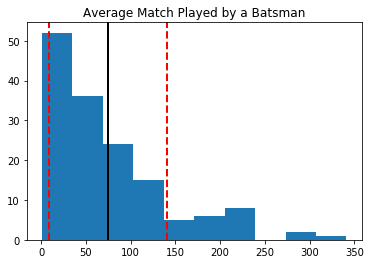

In [4]:
innings=Batsman_Data.Batsman.value_counts()

plt.hist(innings)

plt.axvline(innings.mean(), color='black', linestyle='solid', linewidth=2)


plt.axvline(innings.mean() + innings.std(), color='red', linestyle='dashed', linewidth=2)


plt.axvline(innings.mean() - innings.std(), color='red', linestyle='dashed', linewidth=2) 


plt.title('Average Match Played by a Batsman')

Text(0.5, 1.0, 'Most Matches Played by a Batsman')

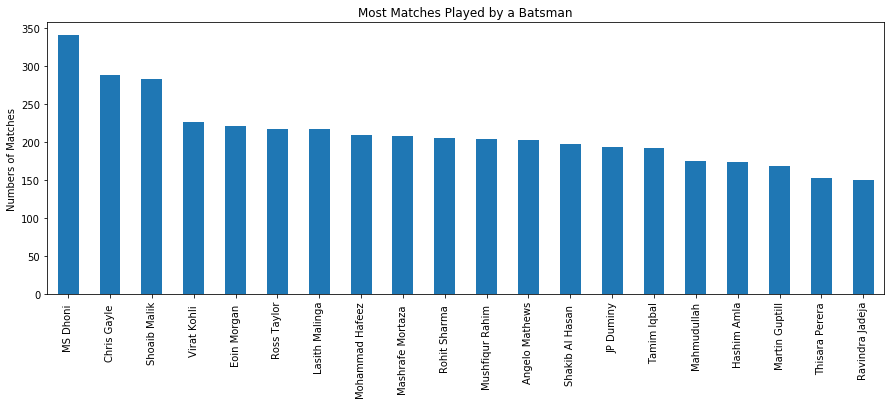

In [5]:
Batsman_Data.Batsman.value_counts().head(20).plot(kind='bar',figsize=(15,5))
plt.ylabel('Numbers of Matches')
plt.title('Most Matches Played by a Batsman')

Text(0.5, 1.0, 'Average Strike Rate of Player')

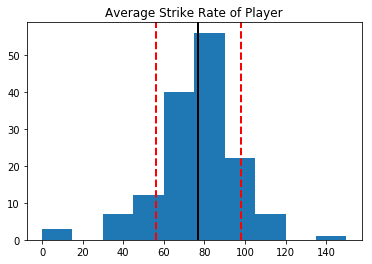

In [8]:
sr=Batsman_Data.groupby('Batsman')['SR'].mean()

plt.hist(sr)

plt.axvline(sr.mean(), color='black', linestyle='solid', linewidth=2)


plt.axvline(sr.mean() + sr.std(), color='red', linestyle='dashed', linewidth=2)


plt.axvline(sr.mean() - sr.std(), color='red', linestyle='dashed', linewidth=2) 


plt.title('Average Strike Rate of Player')

Text(0.5, 1.0, 'Batsman With Highest Strike Rate')

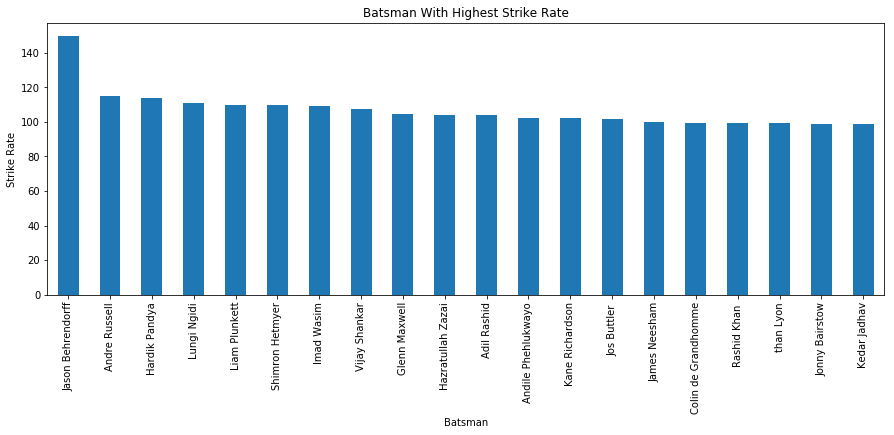

In [9]:
Batsman_Data.groupby('Batsman')['SR'].mean().sort_values(ascending = False).head(20).plot(kind='bar',figsize=(15,5))
plt.ylabel('Strike Rate')
plt.title('Batsman With Highest Strike Rate')

Text(0.5, 1.0, 'Batsman With Highest Average Runs')

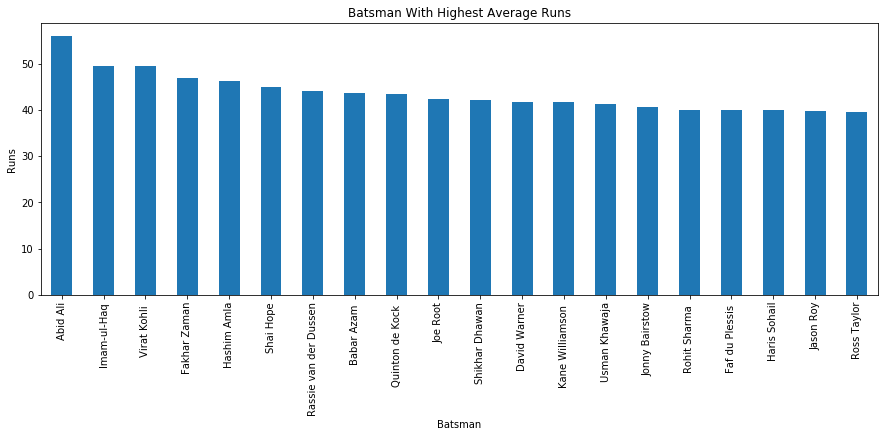

In [10]:
Batsman_Data.groupby('Batsman')['Runs'].mean().sort_values(ascending = False).head(20).plot(kind='bar',figsize=(15,5))
plt.ylabel('Runs')
plt.title('Batsman With Highest Average Runs')

Text(0.5, 1.0, "Not Out in ODI's")

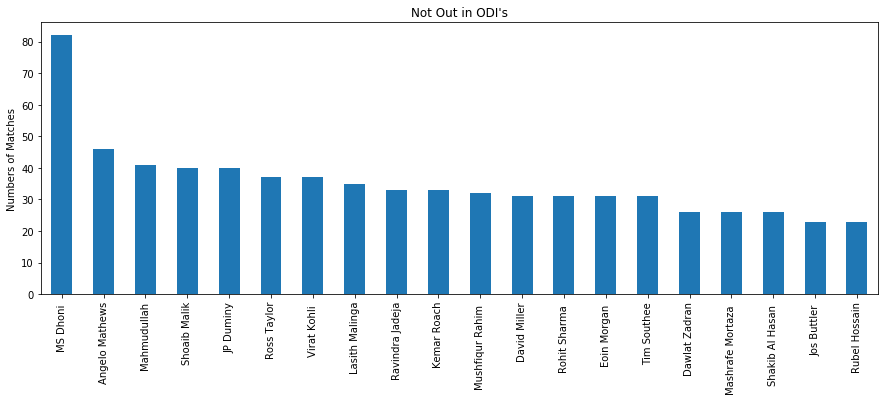

In [11]:
 def not_out():
    nt_out = []
    for x in range(0, len(Batsman_Data.Bat1)):
        runs = str(Batsman_Data.Bat1[x])
        if("*" in runs):
            nt_out.append(Batsman_Data.Batsman[x])
    pd.Series(nt_out).value_counts().head(20).plot(kind='bar', figsize=(15,5))
    plt.ylabel('Not Out in Matches')
not_out()
plt.ylabel('Numbers of Matches')
plt.title("Not Out in ODI's")

Text(0.5, 1.0, 'Highest ODI Score')

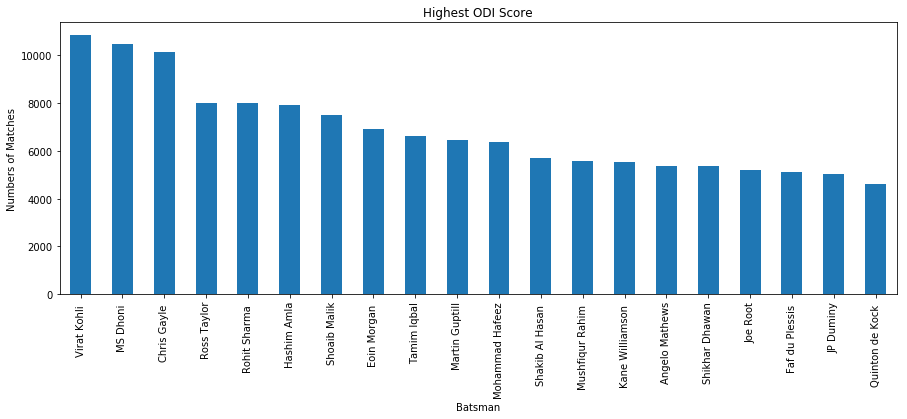

In [12]:
Batsman_Data.groupby('Batsman')['Runs'].sum().sort_values(ascending = False).head(20).astype(int).plot(kind='bar',figsize=(15,5))
plt.ylabel('Numbers of Matches')
plt.title('Highest ODI Score')

Text(0.5, 1.0, 'Sixes and Fours')

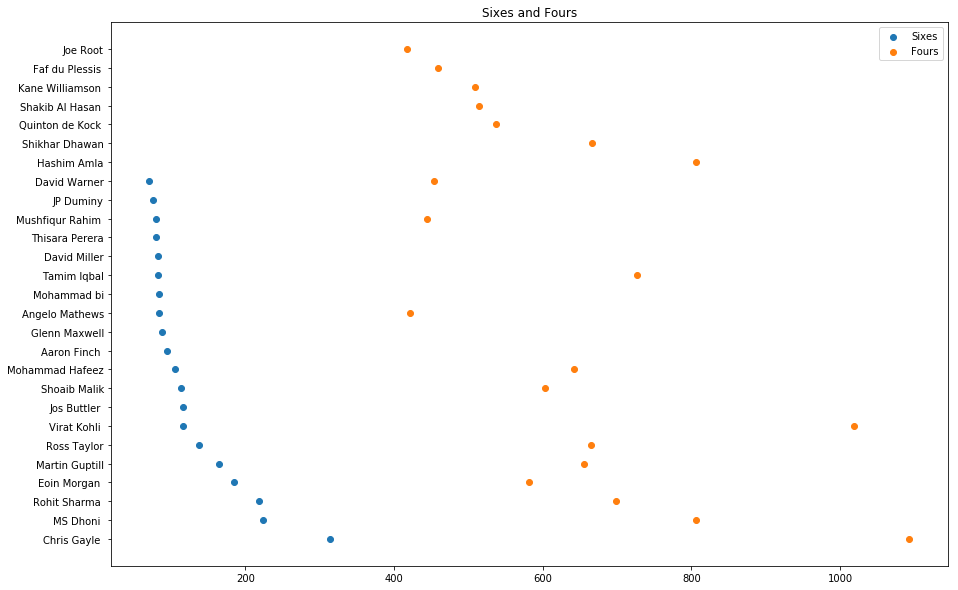

In [13]:
sixes=Batsman_Data.groupby('Batsman')['Sixes'].sum(numeric_only=True).sort_values(ascending = False).head(20).astype(int)
fours=Batsman_Data.groupby('Batsman')['Fours'].sum(numeric_only=True).sort_values(ascending = False).head(20).astype(int)
plt.figure(figsize=(15, 10))
plt.scatter(sixes,sixes.index,label='Sixes')
plt.scatter(fours,fours.index,label='Fours')
plt.legend(loc='upper right') 
plt.title('Sixes and Fours')

In [14]:
groupby_dict = {"Fours":"Total Boundries", 
           "Sixes":"Total Boundries",  
          "Batsman":"Batsman","Opposition":"v Opposition" } 
bat=Batsman_Data.groupby(groupby_dict, axis = 1).sum().sort_values(ascending = False, by='Total Boundries').head(20)
print (bat.to_string(index=False))


          Batsman  Total Boundries    v Opposition
    Rohit Sharma              42.0     v Sri Lanka
   Martin Guptill             35.0   v West Indies
     Fakhar Zaman             29.0      v Zimbabwe
    Rohit Sharma              28.0     v Australia
 Quinton de Kock              27.0     v Australia
   Martin Guptill             26.0  v South Africa
     Chris Gayle              26.0      v Zimbabwe
       Alex Hales             26.0      v Pakistan
    Rohit Sharma              25.0     v Sri Lanka
     Chris Gayle              25.0       v England
        MS Dhoni              25.0     v Sri Lanka
     Jos Buttler              25.0   v West Indies
    Rohit Sharma              24.0   v West Indies
     David Warner             24.0      v Pakistan
       Evin Lewis             24.0       v England
     David Warner             24.0  v South Africa
     David Warner             24.0   v Afghanistan
        Shai Hope             24.0       v Ireland
     Aaron Finch              2

Text(0.5, 1.0, 'Runs Against Opposing Team ')

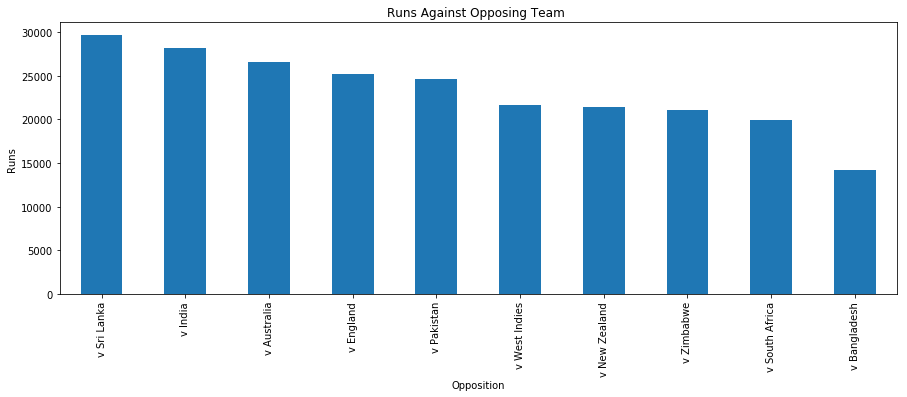

In [15]:
Batsman_Data.groupby('Opposition')['Runs'].sum().sort_values(ascending = False).head(10).plot(kind='bar',figsize=(15,5))
plt.ylabel('Runs')
plt.title('Runs Against Opposing Team ')

Text(0.5, 1.0, 'Most Runs Scored in a Ground')

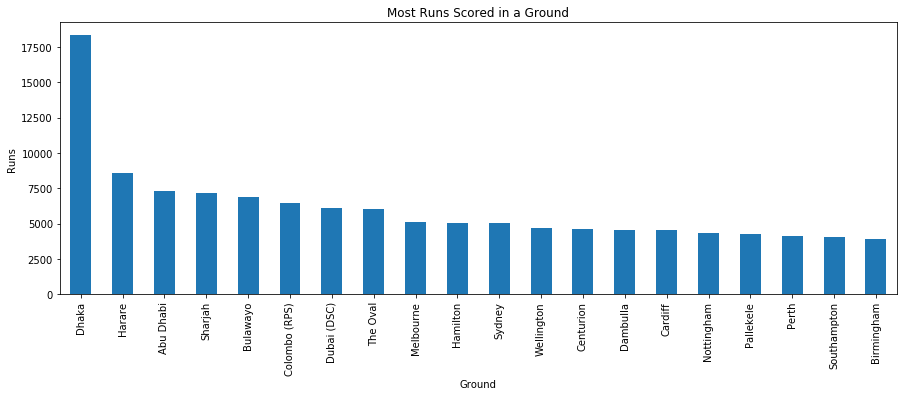

In [16]:
Batsman_Data.groupby('Ground')['Runs'].sum().sort_values(ascending = False).head(20).plot(kind='bar',figsize=(15,5))
plt.ylabel('Runs')
plt.title('Most Runs Scored in a Ground')

In [17]:
Batsman_Data.groupby('Ground')['Runs'].sum().sort_values(ascending = True).head(20)

Ground
Cairns                     0.0
Sheikhupura                0.0
Georgetown                 2.0
Hyderabad (Sind)           4.0
Vijayawada                 5.0
Canterbury                 6.0
irobi (Ruaraka)           11.0
Tangier                   12.0
Jodhpur                   27.0
Pietermaritzburg          28.0
Faridabad                 42.0
Colombo (PSS)             45.0
Chandigarh                50.0
Chittagong                77.0
Glasgow                   77.0
Melbourne (Docklands)     81.0
Queenstown                89.0
Kandy                     93.0
Margao                   102.0
Toronto                  108.0
Name: Runs, dtype: float64

Text(0.5, 1.0, 'Minimum Runs Scored in a Ground')

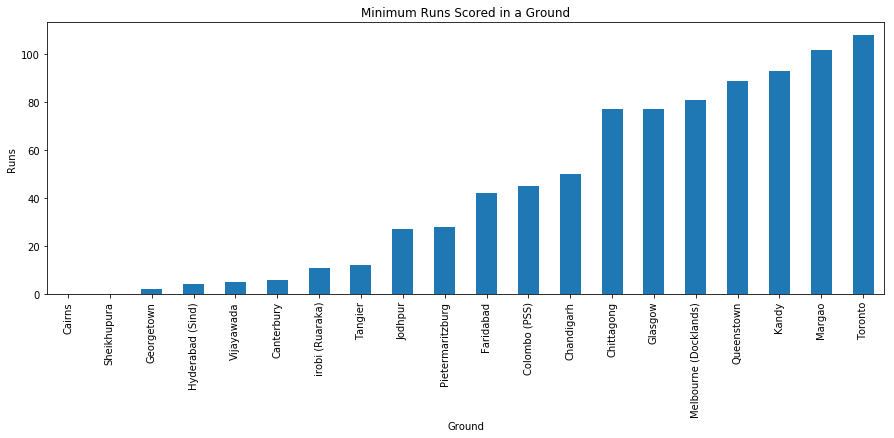

In [18]:
Batsman_Data.groupby('Ground')['Runs'].sum().sort_values(ascending = True).head(20).plot(kind='bar',figsize=(15,5))
plt.ylabel('Runs')
plt.title('Minimum Runs Scored in a Ground')

In [19]:
print((Batsman_Data.Ground == 'Dhaka').sum())

839


Text(0.5, 1.0, 'Most Matches Played in a  Ground')

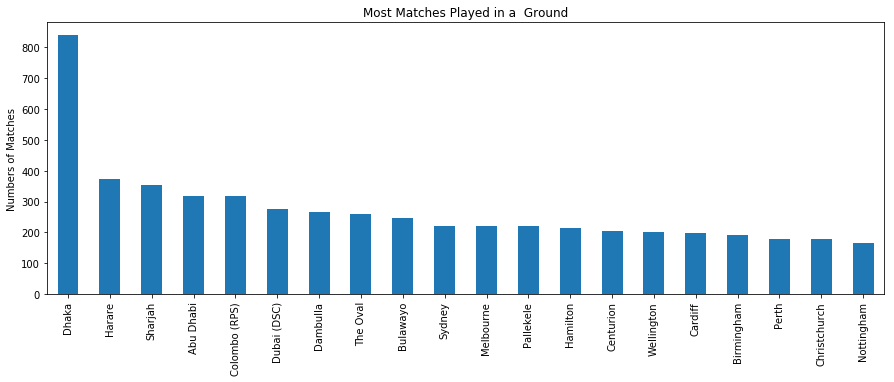

In [20]:
a=Batsman_Data.Ground.value_counts().head(20).plot(kind='bar',figsize=(15,5))
plt.ylabel('Numbers of Matches')
plt.title('Most Matches Played in a  Ground')

#  Propose Further Research:
In the future I want to use this data to predict below mentioned comparison:
1.)	Players vs Players  
2.)	Players vs Oppositions  
3.)	Players vs Bowlers  
4.) Best All-Rounders  
